# Data Exploration

In [1]:
# importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset
data= sns.load_dataset("iris")

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [15]:
# chack the rows and columns in dataset
data.shape

(150, 5)

In [17]:
# print names of the columns
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
# datatypes of columns
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [21]:
# info of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
# info of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
#statistical summary of nuemrical column
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Finding Missing values

In [27]:
# finding missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
# check for duplicates
data.duplicated().sum()

1

### Checking Outliers

<Axes: ylabel='sepal_length'>

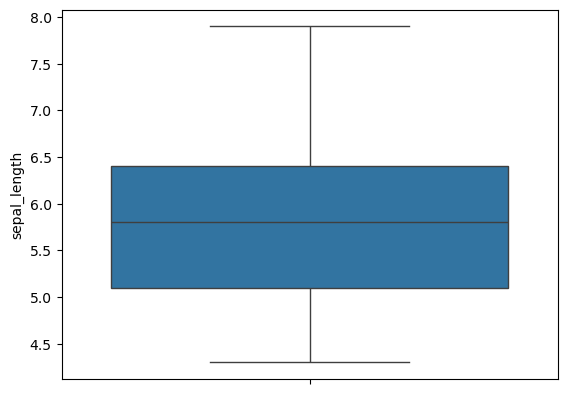

In [31]:
#Checking Outliers
sns.boxplot(data.sepal_length)

<Axes: ylabel='petal_length'>

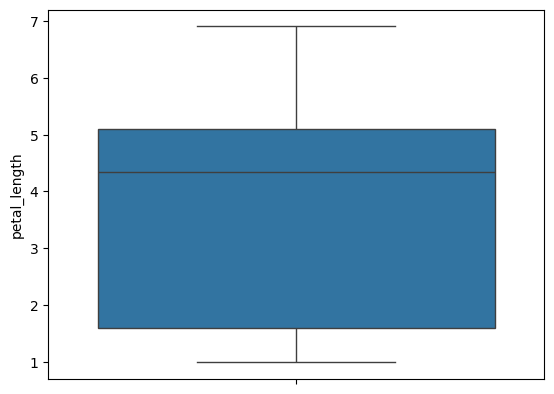

In [33]:
sns.boxplot(data.petal_length)


<Axes: ylabel='petal_width'>

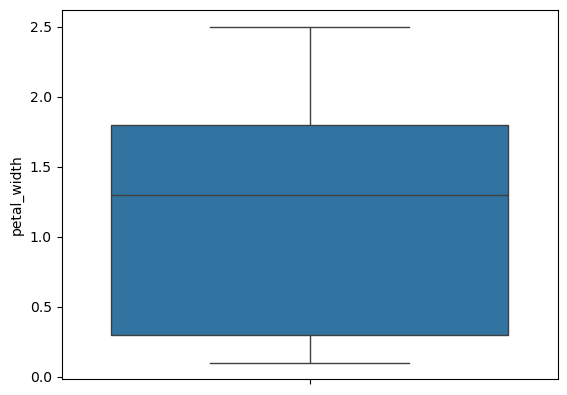

In [35]:
sns.boxplot(data.petal_width)

<Axes: ylabel='sepal_width'>

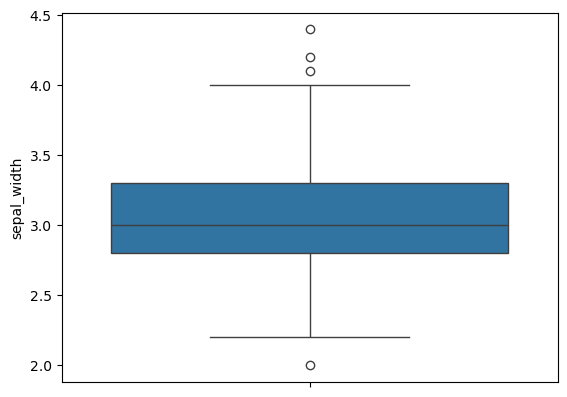

In [37]:
sns.boxplot(data.sepal_width)

#### Handling Outliers

In [39]:
# to see the outliers of sepal_width firstly calculate quantiles and IQR
Q1 = data['sepal_width'].quantile(0.25)
Q1

2.8

In [41]:
Q3 = data['sepal_width'].quantile(0.75)
Q3

3.3

In [43]:
IQR = Q3 - Q1
IQR

0.5

In [45]:
min_limit = Q1 - 1.5* IQR
min_limit

2.05

In [51]:
max_limit = Q3 + 1.5* IQR
max_limit

4.05

In [47]:
data.loc[data['sepal_width']<min_limit]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


In [53]:
data.loc[data['sepal_width']>max_limit]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [55]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['sepal_width']>max_limit]) / len(data) *100

2.0

In [57]:
len(data.loc[data['sepal_width']<min_limit]) / len(data) *100

0.6666666666666667

In [59]:
#imputing  the outliers using median
data.loc[data['sepal_width']>max_limit,'sepal_width']=data['sepal_width'].median()

In [61]:
data.loc[data['sepal_width']<min_limit,'sepal_width']=data['sepal_width'].median()


<Axes: ylabel='sepal_width'>

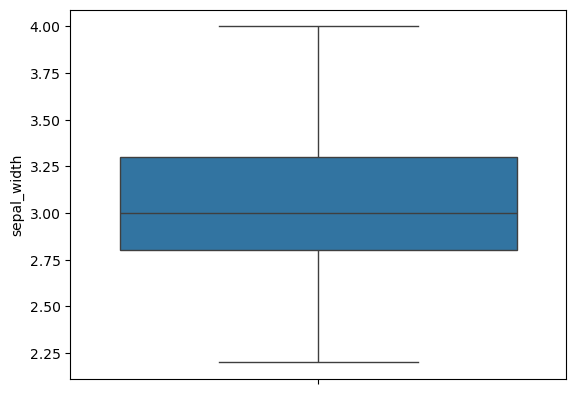

In [63]:
sns.boxplot(data.sepal_width)

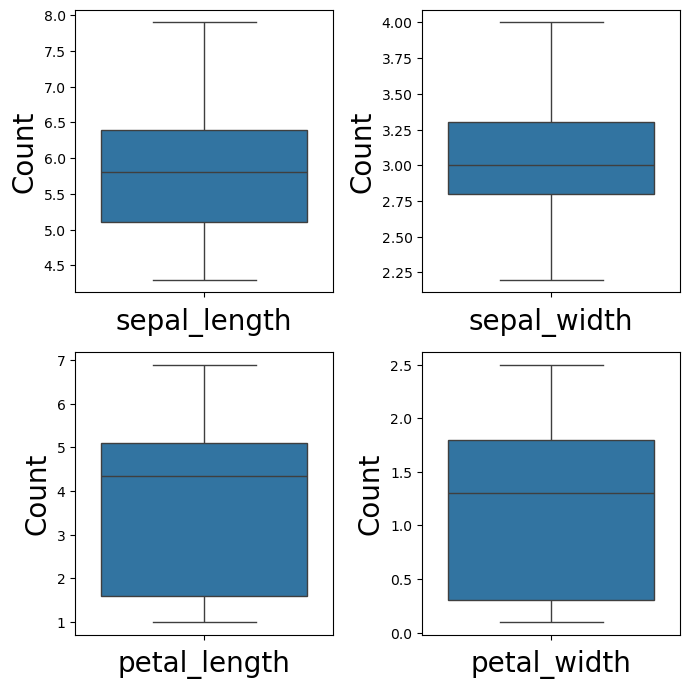

In [65]:
plt.figure(figsize=(7,7),facecolor='white')
plotnumber=1

for column in data.drop('species',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Data Visualization

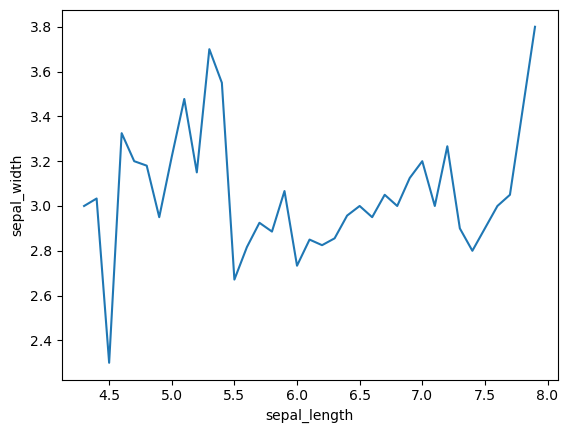

In [67]:
# Exploratory data analysis
sns.lineplot(data=data,x='sepal_length', y='sepal_width', ci=None)
plt.show()

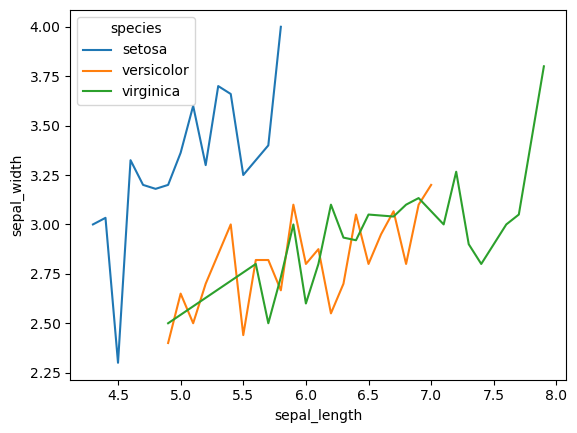

In [69]:
sns.lineplot(x='sepal_length', y='sepal_width', data=data,hue='species', ci=None)
plt.show()

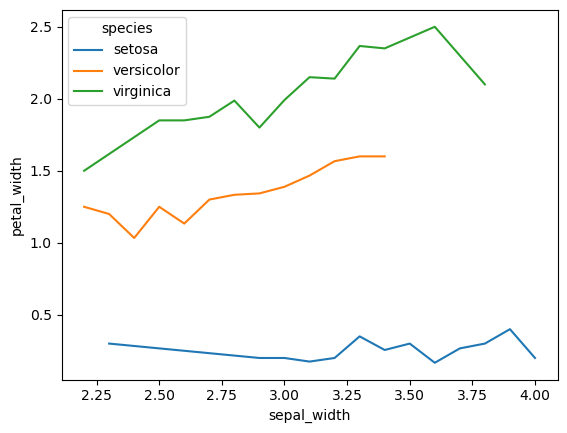

In [71]:
sns.lineplot(x='sepal_width', y='petal_width', data=data,hue='species', ci=None)
plt.show()

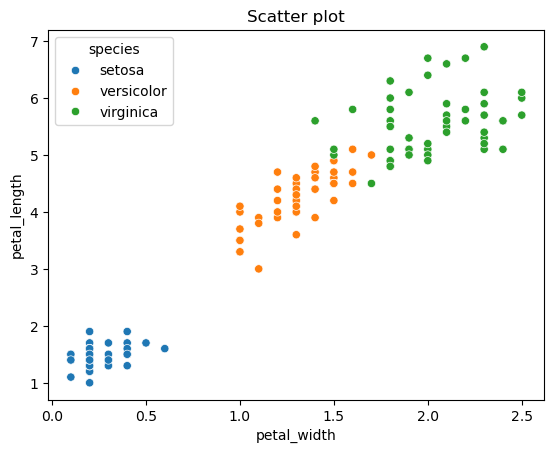

In [73]:
sns.scatterplot(x='petal_width',y='petal_length',data=data, hue='species')
plt.title("Scatter plot")
plt.show()


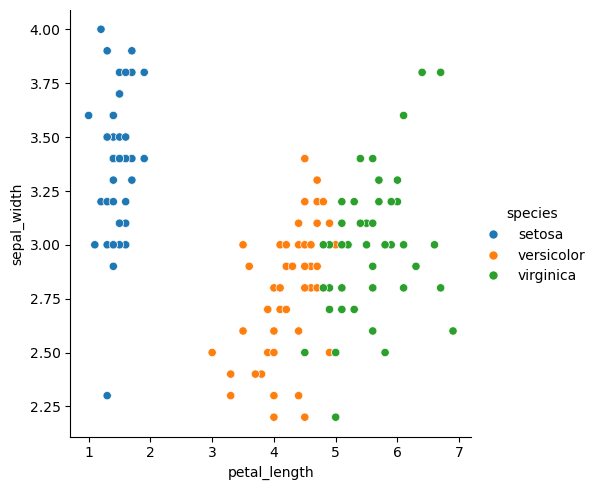

In [75]:
sns.relplot(data=data,x='petal_length',y='sepal_width', hue = 'species')
plt.show()


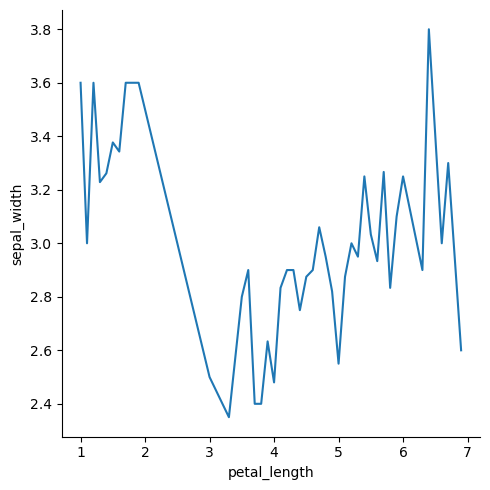

In [77]:
sns.relplot(data=data,x='petal_length',y='sepal_width',kind='line',ci=None)
plt.show()

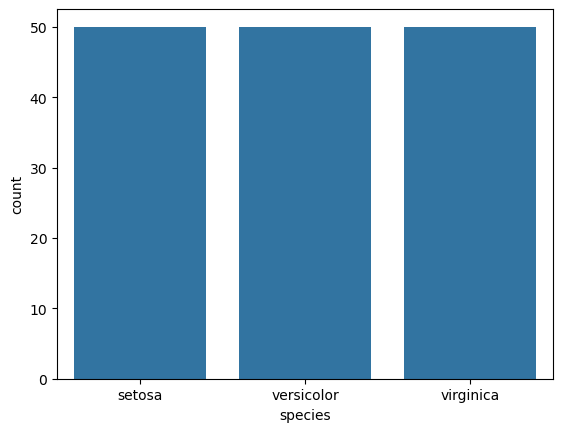

In [79]:
sns.countplot(x='species', data=data)
plt.show()

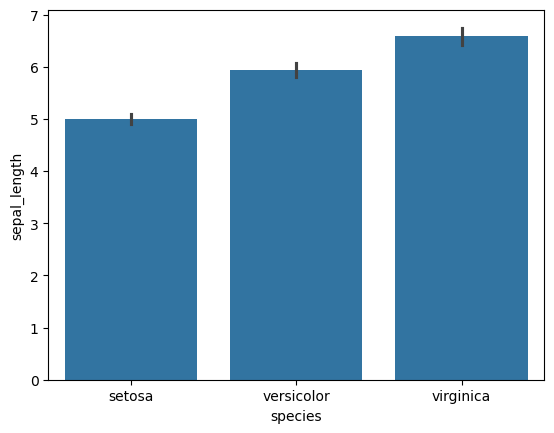

In [81]:
sns.barplot(x='species', y='sepal_length', data=data)
plt.show()

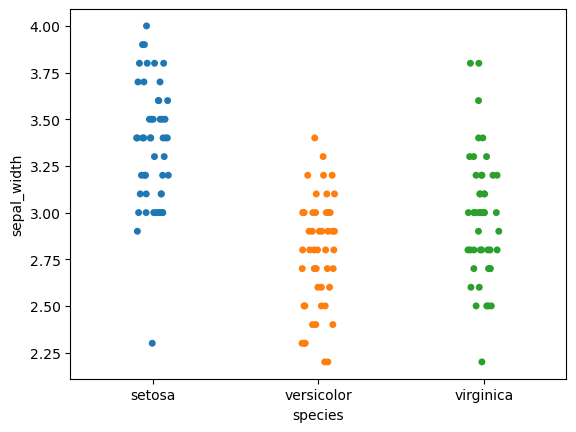

In [83]:
sns.stripplot(x='species', y='sepal_width', data=data, hue='species')
plt.show()

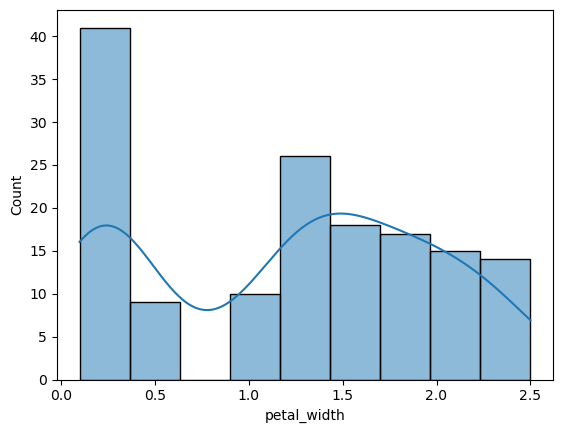

In [85]:
sns.histplot(x='petal_width',data=data, kde=True)
plt.show()

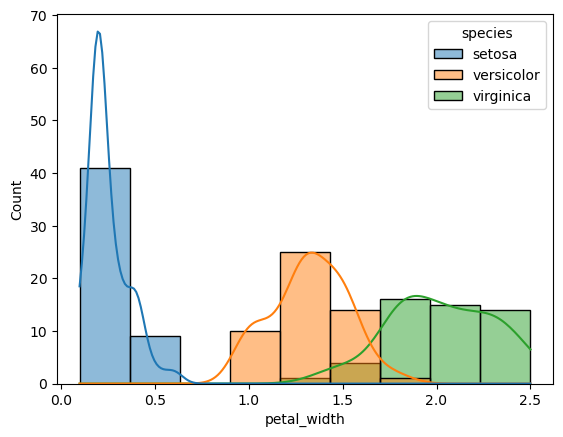

In [87]:
sns.histplot(x='petal_width',data=data,hue='species',kde=True)
plt.show()

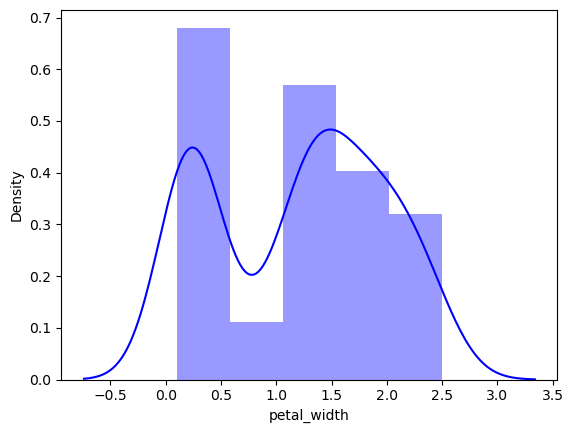

In [91]:
sns.distplot(data['petal_width'],color='b')
plt.show()


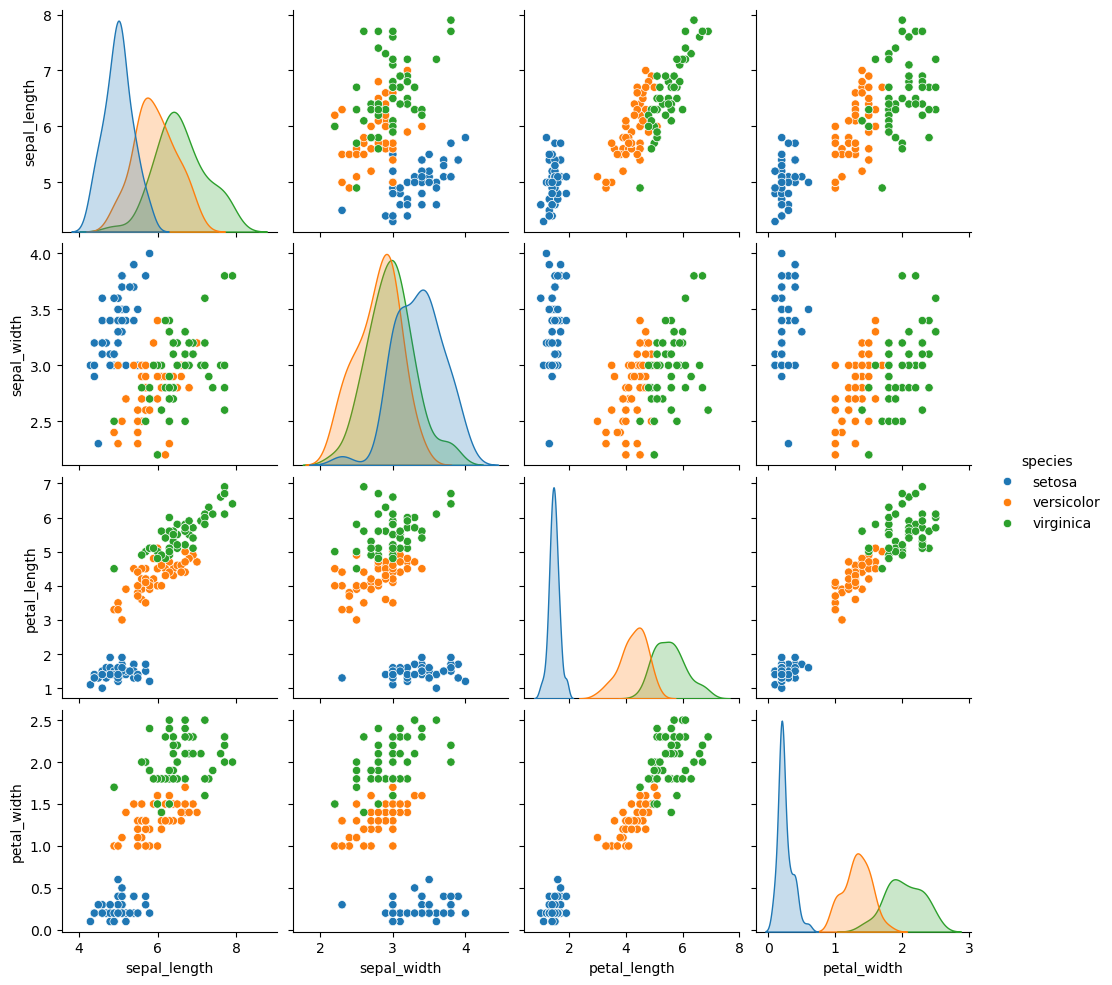

In [93]:
sns.pairplot(data=data, hue='species')
plt.show()

In [95]:
# correlation between the different parameters
corr = data[['sepal_length','sepal_width','petal_length','petal_width']].corr()


In [97]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.120701,0.871754,0.817941
sepal_width,-0.120701,1.000000,-0.396159,-0.331892
petal_length,0.871754,-0.396159,1.000000,0.962865
petal_width,0.817941,-0.331892,0.962865,1.000000


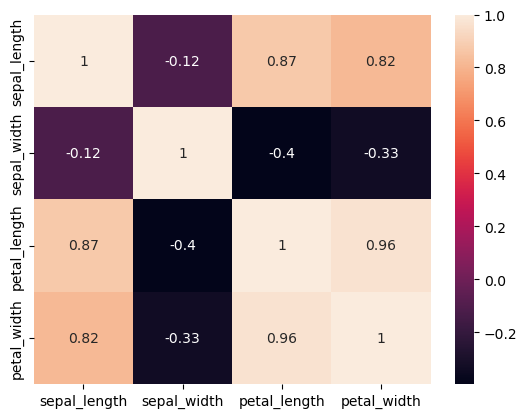

In [99]:
sns.heatmap(corr, annot = True)
plt.show()